HR diagrams
---

Download all the Jupyter notebooks from: https://github.com/HeloiseS/hoki/tree/master/tutorials

#  Initial imports

In [1]:
from hoki import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('tuto.mplstyle')

### In this tutorial you will:

- Learn about the HR-diagram data structure of BPASS
- Learn how to load them in using hoki
- Use the tools in `hoki` to explore your HR diagram data and make science plots
- Learn to customise the `hoki` plots


#   Loading in the data

###  About the tools you're about to use. 
HR diagram data can be loaded using the `hoki.load.model_output()` function. This function will automatically know that you are trying to load an HR diagram from the name of the text file.

**Important**:
You should note that when loading an HR diagram you need to specify what type of HR diagram you want to load form the file. The HR diagram files are large and quite complex - see left hand side of the diagam below - so we'll be loading in one type of HR diagram at a time. 

You can choose from 3 options:
- `'TL'`: For a temperature/Luminosity HR diagram
- `'Tg'`: For a temperature/surface gravity HR diagram
- `'TTG'`: For a temperature/(temperature**4/surface gravity) HR diagram

These options are there for 2 reasons: 
* 1.They tell the object which segment of the text file to load in 
* 2.They tell the plotting function what grid to create in order to plot the contours (also picks the right axis labels).

![mynewimage](HRD_data.png)


###  Loading the HR diagrams

In [2]:
# Loading the HR diagrams for signle stars and binary star populations 
sin_hr_diagram = load.model_output('./data/hrs-sin-imf135_300.z020.dat', hr_type = 'TL')
bin_hr_diagram = load.model_output('./data/hrs-bin-imf135_300.z020.dat', hr_type = 'TL')

###  Loading some observational data

We're going to want to plot some observational data to compare to our models. A nice way to do that is to use `pandas`.

In [3]:
# Loading the observational data of Upper Scorpio
usco = pd.read_csv('./data/USco.dat', sep='\t', engine='python', names=['Temperature', 'Luminosity'])

In [4]:
usco.head()

,Temperature,Luminosity
0,3.756,0.38
1,3.742,0.34
2,3.742,0.36
3,3.750,0.08
4,3.728,0.27


# Plotting HR diagrams

Now that we have loaded in our data, it's time to create some visualisation. The advantage of using the `HRDiagrams` object is that it comes with an **easy-to-use plotting method** that is highly **versatile** and designed to create **publication-ready figures**. 

Let's run through a couple of ways you can use this tool and make it your own. 

### Making a single plot
First we are going to make just one HR diagram plot. The plotting method returns the plote object, which **allows you to customize you plot**. 

For example you can **add observational data**, some **text**, a **title**, a **legend** and redefine the axis **limits** to create a more effective visualisation. 

Text(0.5, 1.0, 'Single stars')

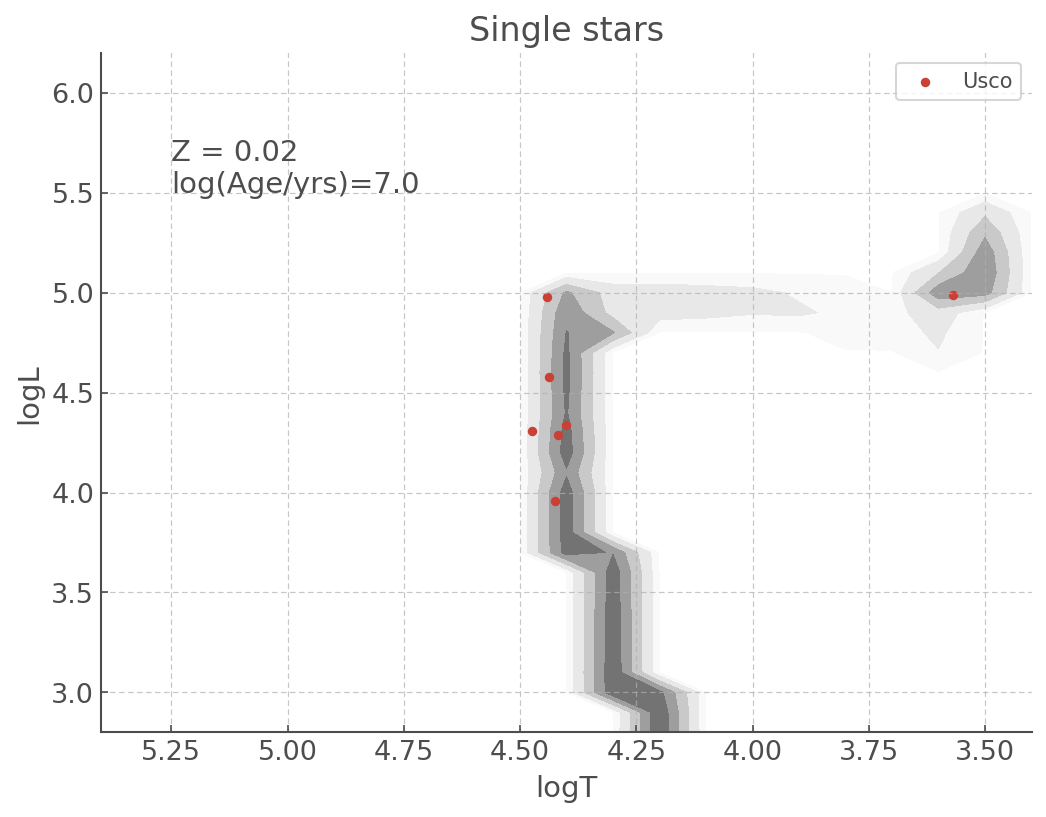

In [5]:
# Just maing sure teh figure size is sensible
plt.figure(figsize=(8,6))

# Plotting the hr_diagram (all hydrogen abundances added up) at the 10 million year time bin
my_plot = sin_hr_diagram.plot(log_age=7.0)

# Addind the observational data of Upper Scorpio
my_plot.scatter(usco.Temperature, usco.Luminosity, label='Usco', s=50)

# Customizing the visualisation
my_plot.set_xlim([5.4, 3.4])
my_plot.set_ylim([2.8, 6.2]) # better limits
my_plot.text(5.25, 5.5, "Z = 0.02 \nlog(Age/yrs)=7.0", fontsize = 14) # Informative text
my_plot.legend() # a legend
my_plot.set_title('Single stars') # A title

### Multiple plots

There might be times you want to put multiple plots on the same figure. The good news is the `HRDiagrams.plot()` allows you to do that intuitively! There are actually more than one way to do it, depending on how you like making your subplots in Python, either with `add_subplot()` or `subplots()`.

Here is the same HR diagram as presented above, but with the Single star population on the left and the Binary star population on the right. 

**a) Using `subplots()` syntax**

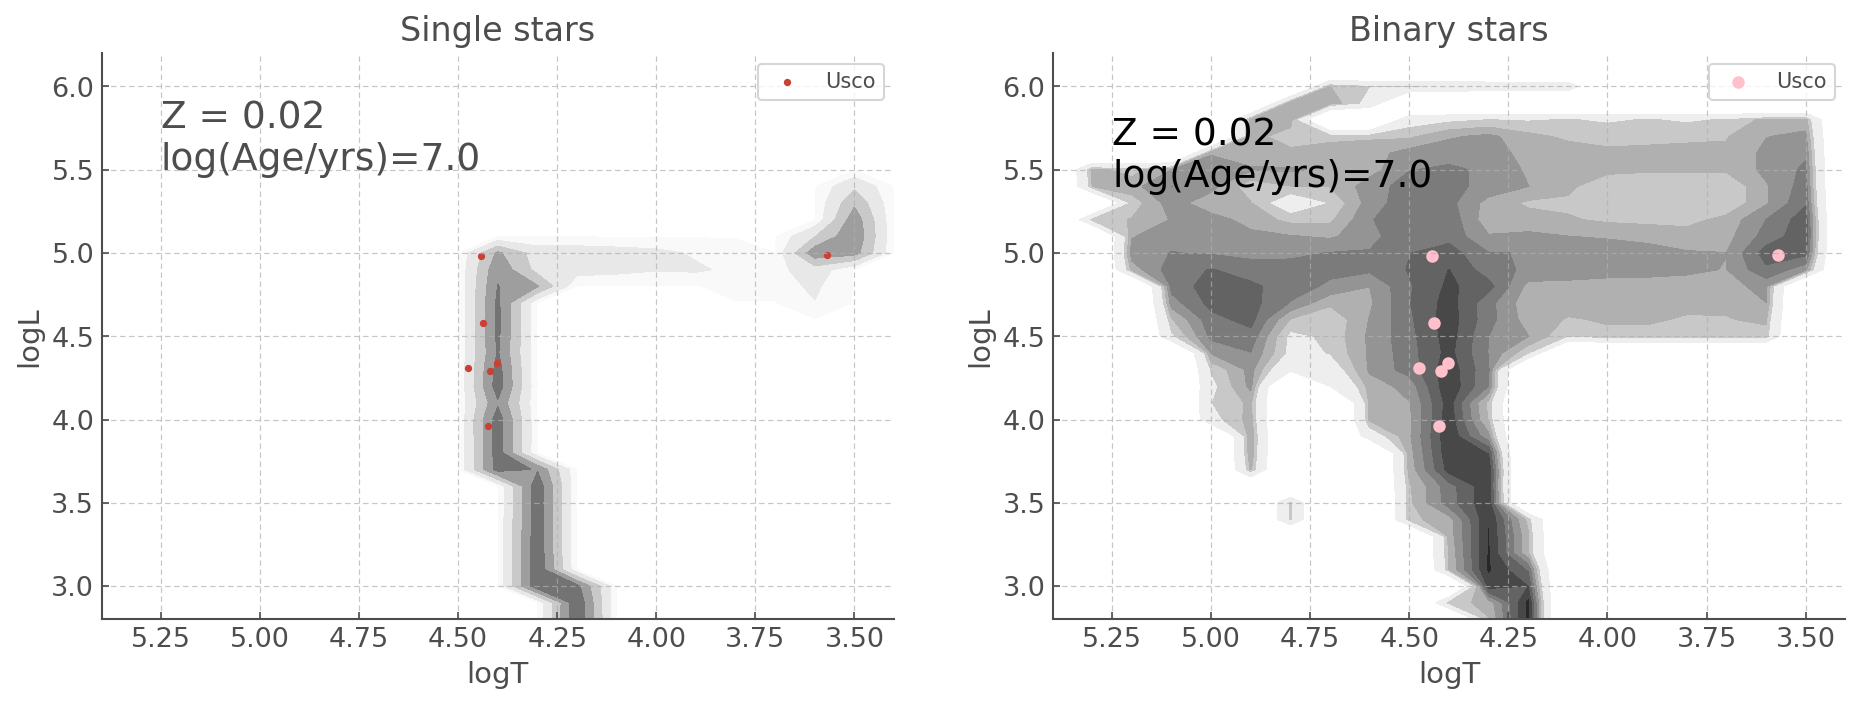

In [6]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sin_hr_diagram.plot(log_age=7.0, loc=ax[0])
ax[0].scatter(usco.Temperature, usco.Luminosity, label='Usco')
ax[0].set_xlim([5.4, 3.4])
ax[0].set_ylim([2.8, 6.2])
ax[0].set_title('Single stars')
ax[0].text(5.25, 5.5, "Z = 0.02 \nlog(Age/yrs)=7.0", fontsize = 18)
ax[0].legend()


bin_hr_diagram.plot(log_age=7.0, loc=ax[1])
ax[1].scatter(usco.Temperature, usco.Luminosity, c='pink', s=100, label='Usco')
ax[1].set_xlim([5.4, 3.4])
ax[1].set_ylim([2.8, 6.2])
ax[1].set_title('Binary stars')
ax[1].text(5.25, 5.4, "Z = 0.02 \nlog(Age/yrs)=7.0", color='k', fontsize = 18)
ax[1].legend()

**b) Using `add_subplot()` syntax**

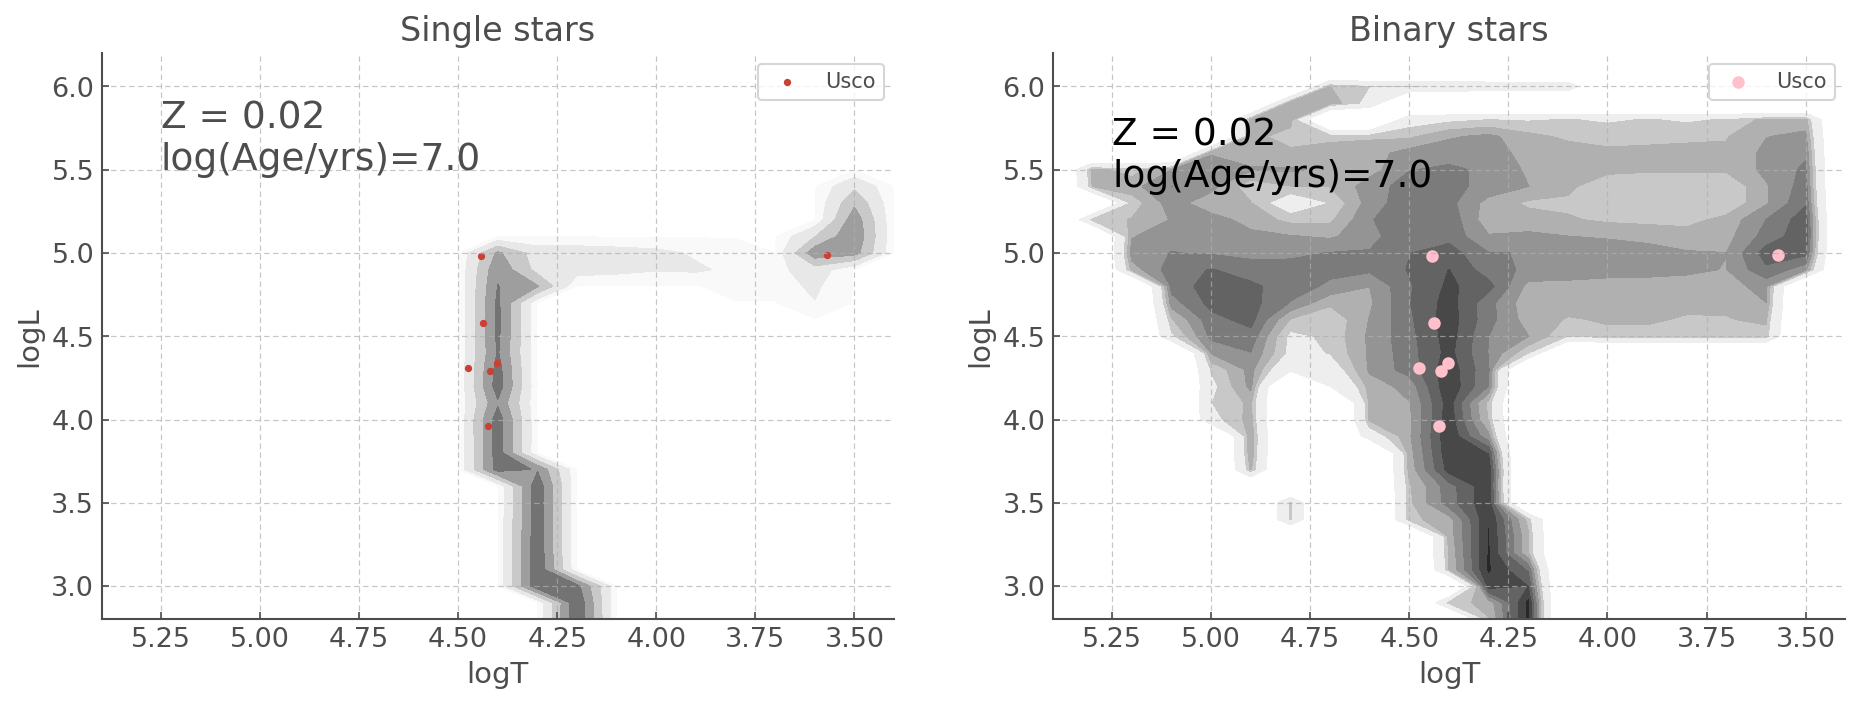

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sin_plot = sin_hr_diagram.plot(log_age=7, loc=121)
sin_plot .scatter(usco.Temperature, usco.Luminosity, label='Usco')
sin_plot .set_xlim([5.4, 3.4])
sin_plot .set_ylim([2.8, 6.2])
sin_plot .set_title('Single stars')
sin_plot .text(5.25, 5.5, "Z = 0.02 \nlog(Age/yrs)=7.0", fontsize = 18)
sin_plot .legend()


bin_plot = bin_hr_diagram.plot(log_age=7, loc=122)
bin_plot.scatter(usco.Temperature, usco.Luminosity, s=100, c='pink', label='Usco')
bin_plot.set_xlim([5.4, 3.4])
bin_plot.set_ylim([2.8, 6.2])
bin_plot.set_title('Binary stars')
bin_plot.text(5.25, 5.4, "Z = 0.02 \nlog(Age/yrs)=7.0", color='k', fontsize = 18)
bin_plot.legend()

# Customizing your plots with matplotlib key word arguments

Althought the default parameters for the HR diagram pltos were chosen to allow the creating of publication-ready plots with as few modifications as possible, the plotting function of `HRDiagrams` objects are designed to take any subplementary key word arguments and pass them on to `matplotlib.pyplot.contour`. 

This allows a much greater level of flexibility when making graphics. 
For example if you wish to cahnge the colormap you can do the following. 

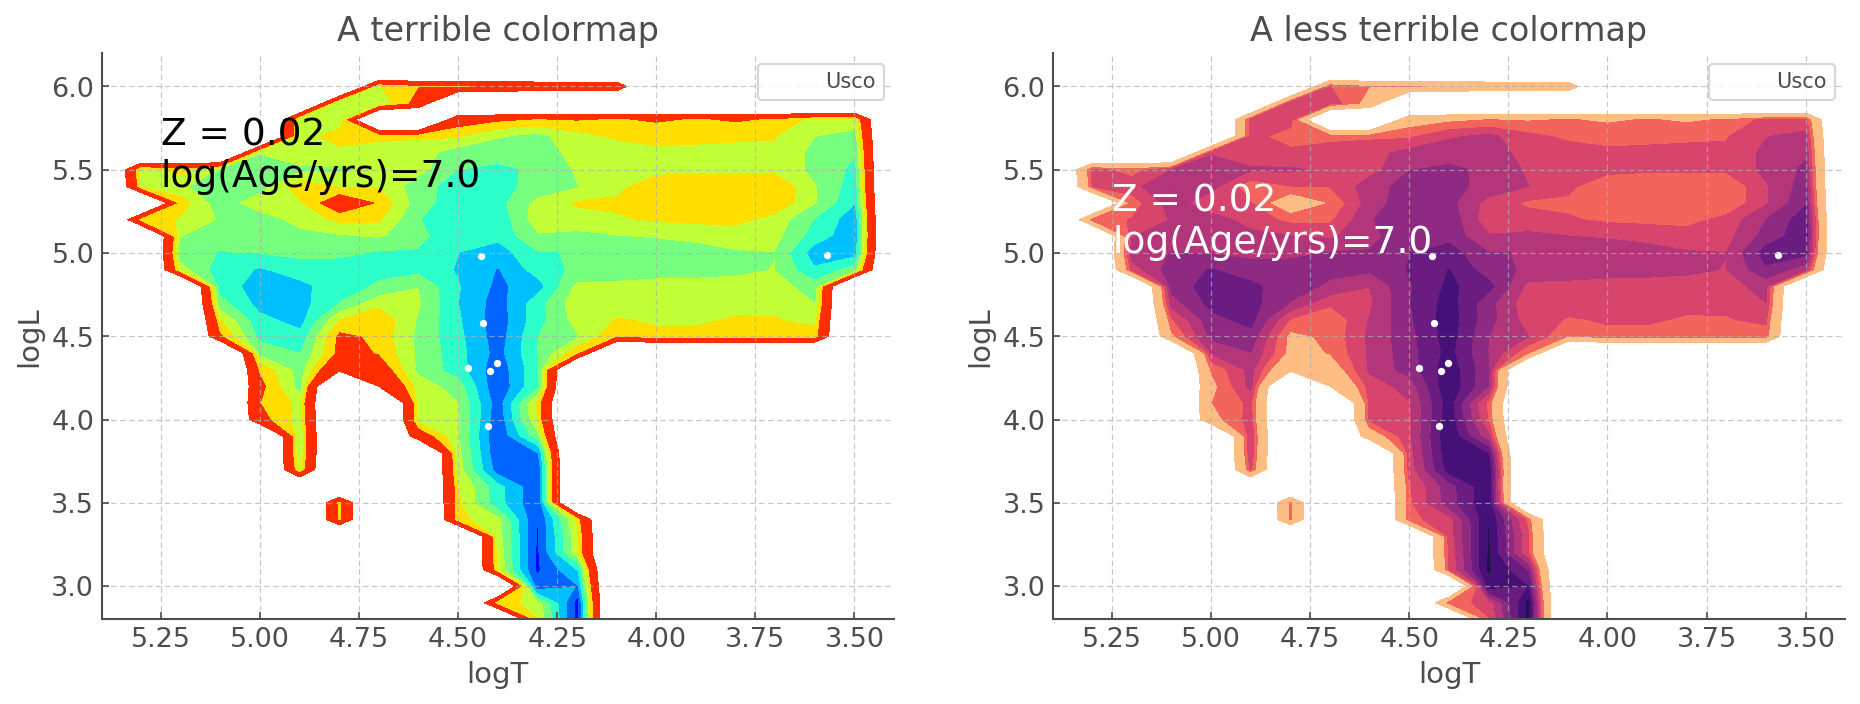

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

bin_hr_diagram.plot(log_age=7, loc=ax[0], cmap='jet_r') # levels adjusted for visualisation
ax[0].scatter(usco.Temperature, usco.Luminosity, c='w', label='Usco')
ax[0].set_xlim([5.4, 3.4])
ax[0].set_ylim([2.8, 6.2])
ax[0].set_title('A terrible colormap')
ax[0].text(5.25, 5.4, "Z = 0.02 \nlog(Age/yrs)=7.0", color='k', fontsize = 18)
ax[0].legend()


bin_hr_diagram.plot(log_age=7, loc=ax[1], cmap='magma_r') # levels adjusted for visualisation
ax[1].scatter(usco.Temperature, usco.Luminosity, c='w', label='Usco')
ax[1].set_xlim([5.4, 3.4])
ax[1].set_ylim([2.8, 6.2])
ax[1].set_title('A less terrible colormap')
ax[1].text(5.25, 5.0, "Z = 0.02 \nlog(Age/yrs)=7.0", color='w', fontsize = 18)
ax[1].legend()



# Creating a publication-ready figure 

In this last section, we will reproduce with `hoki` Figure 23 of Eldirdge, Stanway et al. (2018). This will show you how you can create a publication ready figure just using `hoki` and other ubiquitous python packages.

*Note: This figure will look a little different frmo the published version as the latter was created in IDL*

In [9]:
# renaming our already laoded HR diagram just for readability 
hr_usco_sin, hr_usco_bin = sin_hr_diagram, bin_hr_diagram  

hr_census_bin = load.model_output('./data/hrs-bin-imf135_300.z020.dat', hr_type='TL')
hr_census_sin = load.model_output('./data/hrs-sin-imf135_300.z020.dat', hr_type='TL')

hr_6067_bin = load.model_output('./data/hrs-bin-imf135_300.z030.dat', hr_type='TTG')
hr_6067_sin = load.model_output('./data/hrs-sin-imf135_300.z030.dat', hr_type='TTG')

In [10]:
# Note that it is not recommended to call a column 'T' for a pandas data frame. 
# If you do, you won't be able to call it as mydataframe.T, because .T will default to 
# returning the transpose. 

cyg_L, cyg_L_e, cyg_T, cyg_T_e = np.genfromtxt('./data/census.dat', unpack=True, usecols=(14,15,17,18))

In [11]:
ngc_T, ngc_T_e, ngc_logg, ngc_logg_e = np.loadtxt('./data/ngc6067hr.dat', unpack=True, usecols=(3,4,5,6), skiprows=1)

In the case of the NGC 6067 we want to make a spectroscopic HR diagram. That means that the y axis will be $\log(T^4/g)$ -- this quatity is refered to as TG or log(TG). The trick is, we need to make sure we are using the right units when we do the calculations. 

We want everything to be with respect to solar units, so we'll have to divide by solar surface temperature (5778K) and surface gravity (274 m/s or a log g = 2.4377). We also nee to convert to SI from cgs, so there is a factor of $10^{-2}$ in the g, i.e a `-2` in the log g exponent, that needs to be taken into account. 

We also need to propagate errors. Since it's a mess of logs I'll just use bootstrapping for that. 

*Boostrapping: In this particular case I sample each of my values/data points according to a normal distribution where the mean is the value of that data point and the standard deviation is the error. I do this 1000 times, calculate the corresponding TG, and take the mean and standard deviation of these 1000 TG values.*

In [12]:
TG = []
TG_e = []
for T_i, T_e_i, logg_i, logg_e_i in zip(ngc_T, ngc_T_e, ngc_logg, ngc_logg_e):
    TG.append(np.mean(np.log10((np.random.normal(T_i, T_e_i, 1000)/5778)**4/
                                ((10**(np.random.normal(logg_i-2.4377-2, np.abs(logg_e_i), 1000) ))))))
    TG_e.append(np.std(np.log10((np.random.normal(T_i, T_e_i, 1000)/5778)**4/
                                ((10**(np.random.normal(logg_i-2.4377-2, np.abs(logg_e_i), 1000) ))))))

We also need to make sure we get the log(T) errors (and no, you can't just do `log(ngc_T_e)`). I'm using bootstrapping - because I can. 

In [13]:
T_e = []
for T_i, T_e_i in zip(ngc_T, ngc_T_e):
    T_e.append(np.std(np.log(np.random.normal(T_i, T_e_i, 1000))))

And now it's time to plot all of this!

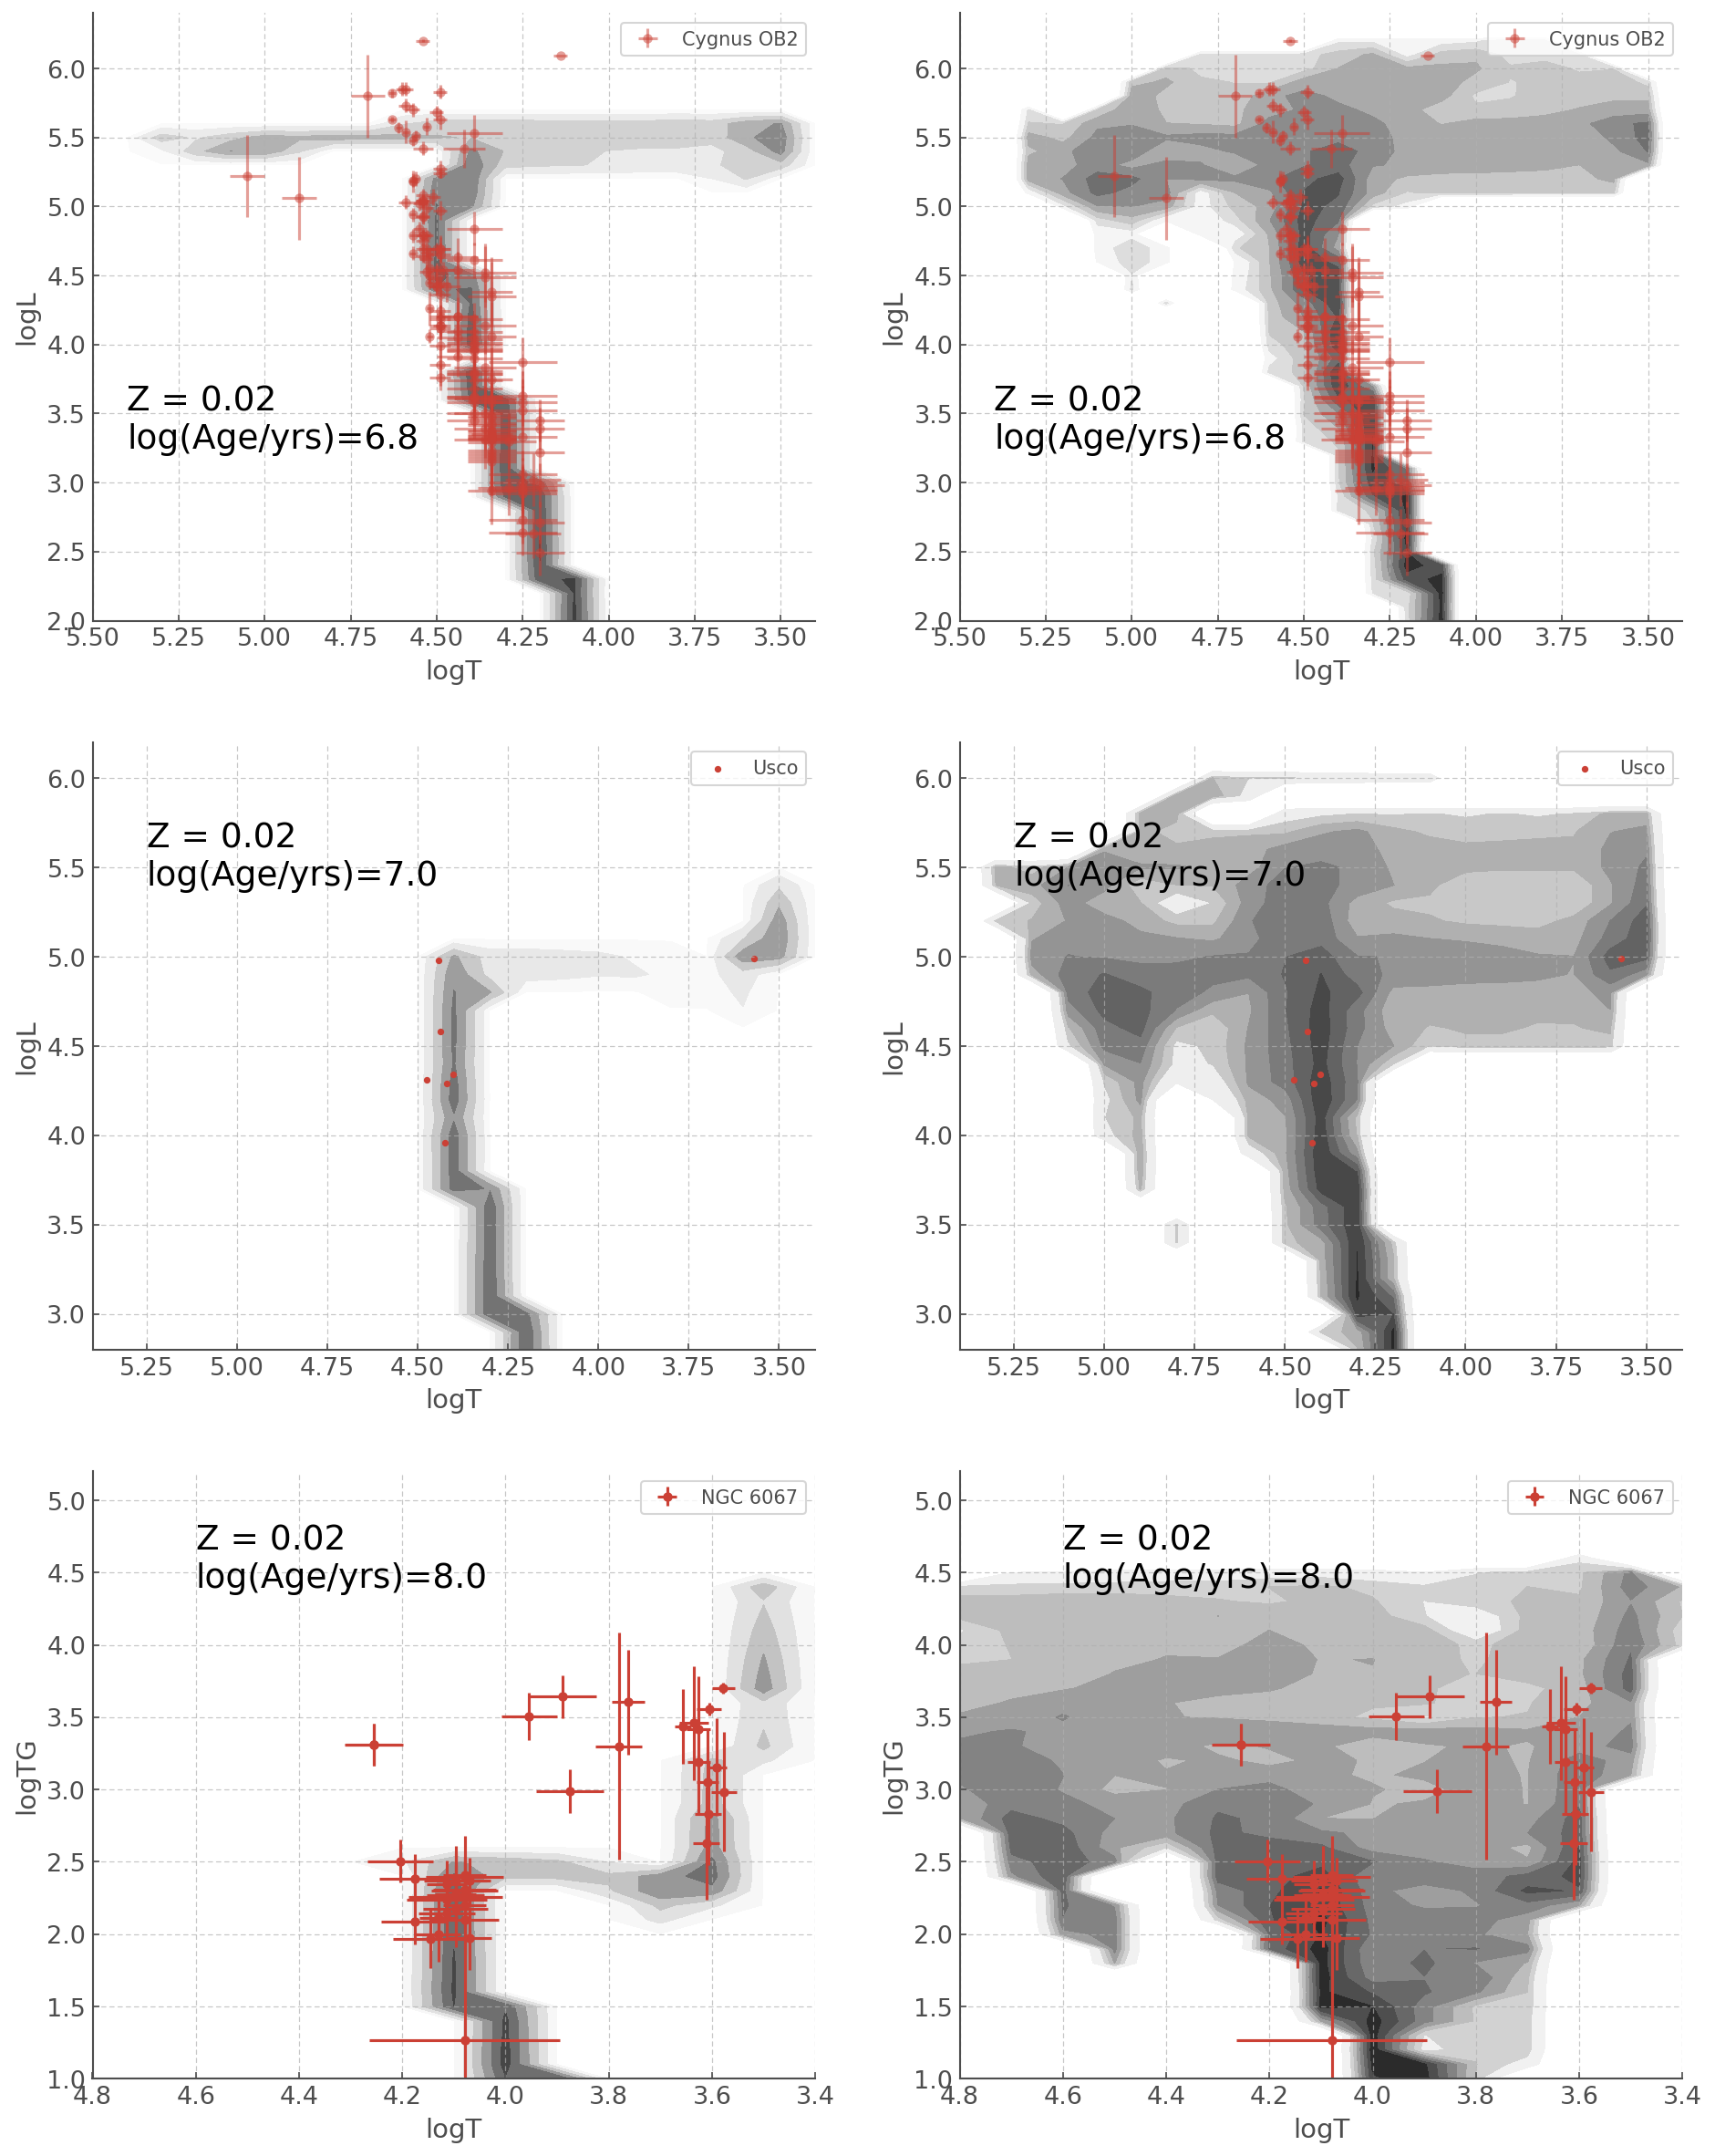

In [14]:
fig, ax = plt.subplots(3,2, figsize=(15,20))

hr_census_sin.plot(log_age=6.8, loc=ax[0,0])
ax[0,0].errorbar(cyg_T, cyg_L, xerr = cyg_T_e, yerr = cyg_L_e,
            ls =' ', marker = 'o', alpha=0.5, label = "Cygnus OB2")
ax[0,0].set_xlim([5.5, 3.4])
ax[0,0].set_ylim([2,6.4])
ax[0,0].text(5.4, 3.25, "Z = 0.02 \nlog(Age/yrs)=6.8", color='k', fontsize = 18)



hr_census_bin.plot(log_age=6.8, loc=ax[0,1])
ax[0,1].errorbar(cyg_T, cyg_L, xerr = cyg_T_e, yerr = cyg_L_e,
            ls =' ', marker = 'o', alpha=0.5, label = "Cygnus OB2")
ax[0,1].set_xlim([5.5, 3.4])
ax[0,1].set_ylim([2,6.4])
ax[0,1].text(5.4, 3.25, "Z = 0.02 \nlog(Age/yrs)=6.8", color='k', fontsize = 18)



hr_usco_sin.plot(log_age=7, loc=ax[1,0]) # levels adjusted for visualisation
ax[1,0].scatter(usco.Temperature, usco.Luminosity, label='Usco')
ax[1,0].set_xlim([5.4, 3.4])
ax[1,0].set_ylim([2.8, 6.2])
ax[1,0].text(5.25, 5.4, "Z = 0.02 \nlog(Age/yrs)=7.0", color='k', fontsize = 18)



hr_usco_bin.plot(log_age=7, loc=ax[1,1]) # levels adjusted for visualisation
ax[1,1].scatter(usco.Temperature, usco.Luminosity, label='Usco')
ax[1,1].set_xlim([5.4, 3.4])
ax[1,1].set_ylim([2.8, 6.2])
ax[1,1].text(5.25, 5.4, "Z = 0.02 \nlog(Age/yrs)=7.0", color='k', fontsize = 18)


hr_6067_sin.plot(log_age=8, loc=ax[2,0])
ax[2,0].errorbar(np.log10(ngc_T), TG, xerr=T_e, yerr=TG_e, label='NGC 6067', ls=' ', 
                 marker='o')
ax[2,0].set_xlim([4.8, 3.4])
ax[2,0].set_ylim([1, 5.2])
ax[2,0].text(4.6, 4.4, "Z = 0.02 \nlog(Age/yrs)=8.0", color='k', fontsize = 18)

hr_6067_bin.plot(log_age=8, loc=ax[2,1])
ax[2,1].errorbar(np.log10(ngc_T), TG, xerr=T_e, yerr=TG_e, label='NGC 6067', ls=' ', 
                 marker='o')
ax[2,1].set_xlim([4.8, 3.4])
ax[2,1].set_ylim([1,5.2])
ax[2,1].text(4.6, 4.4, "Z = 0.02 \nlog(Age/yrs)=8.0", color='k', fontsize = 18)

for axis in ax.reshape(6):
    axis.legend()

# Stacking a range of Ages

But what if you are interested in a stellar population that has a range of ages? 

Using the `HRDiagram` class you can stack HR Diagrams of a range of ages across all three surface abundance categories in a single line!

Let's stack every age bin between 1 and 10 Myrs:

In [15]:
bin_hr_diagram.stack(log_age_min=6.0, log_age_max=6.5)

The following attributes were updated: .all_stacked, .high_H_stacked, .medium_H_stacked, .low_H_stacked.


This should return the following message: 
```
The following attributes were updated: .all_stacked, .high_H_stacked, .medium_H_stacked, .low_H_stacked.
```

It indicates that the stacking was performed successfully, and four attributes of the `HRDiagram` class were update. 

`HRDiagram.all_stacked`, `HRDiagram.high_H_stacked`, `HRDiagram.medium_H_stacked`, `HRDiagram.low_H_stacked`, are the stacked equivalents to `HRDiagram.all`, `HRDiagram.high_H`, `HRDiagram.medium_H`, `HRDiagram.low_H`(see right panel of the Figure at the top of this tutorial).

This means that the original `HRDiagram.all`, `HRDiagram.high_H`, `HRDiagram.medium_H`, `HRDiagram.low_H` attributes **remain untouched** when you run the `.stack()` method - only the "stacked" attributes will be updated.

Note, before you run the `.stack()` method for the first time the "stacked" HRDs are just 100x100 numpy arrays filled with zeros. 

# Plotting HRDs of stacked ages

Now, it's possible you don't actually need to do any opperations on the stacked HRDs, **you just want to plot** HRDs for a range of ages. 

For this you don't even need to use the `.stack()` method, **you can do it directly** in the `.plot()` method: you need to use the parameter `age_range` instead of '`log_age` in the plotting method. 

Here is an example of an HRD at 10 Myrs Vs an aggregate of HRDs from 1 to 10 Myrs.

The following attributes were updated: .all_stacked, .high_H_stacked, .medium_H_stacked, .low_H_stacked.


Text(0.5, 1.0, 'Stacked Age: log(Age/yrs)= 6.0 - 7.0')

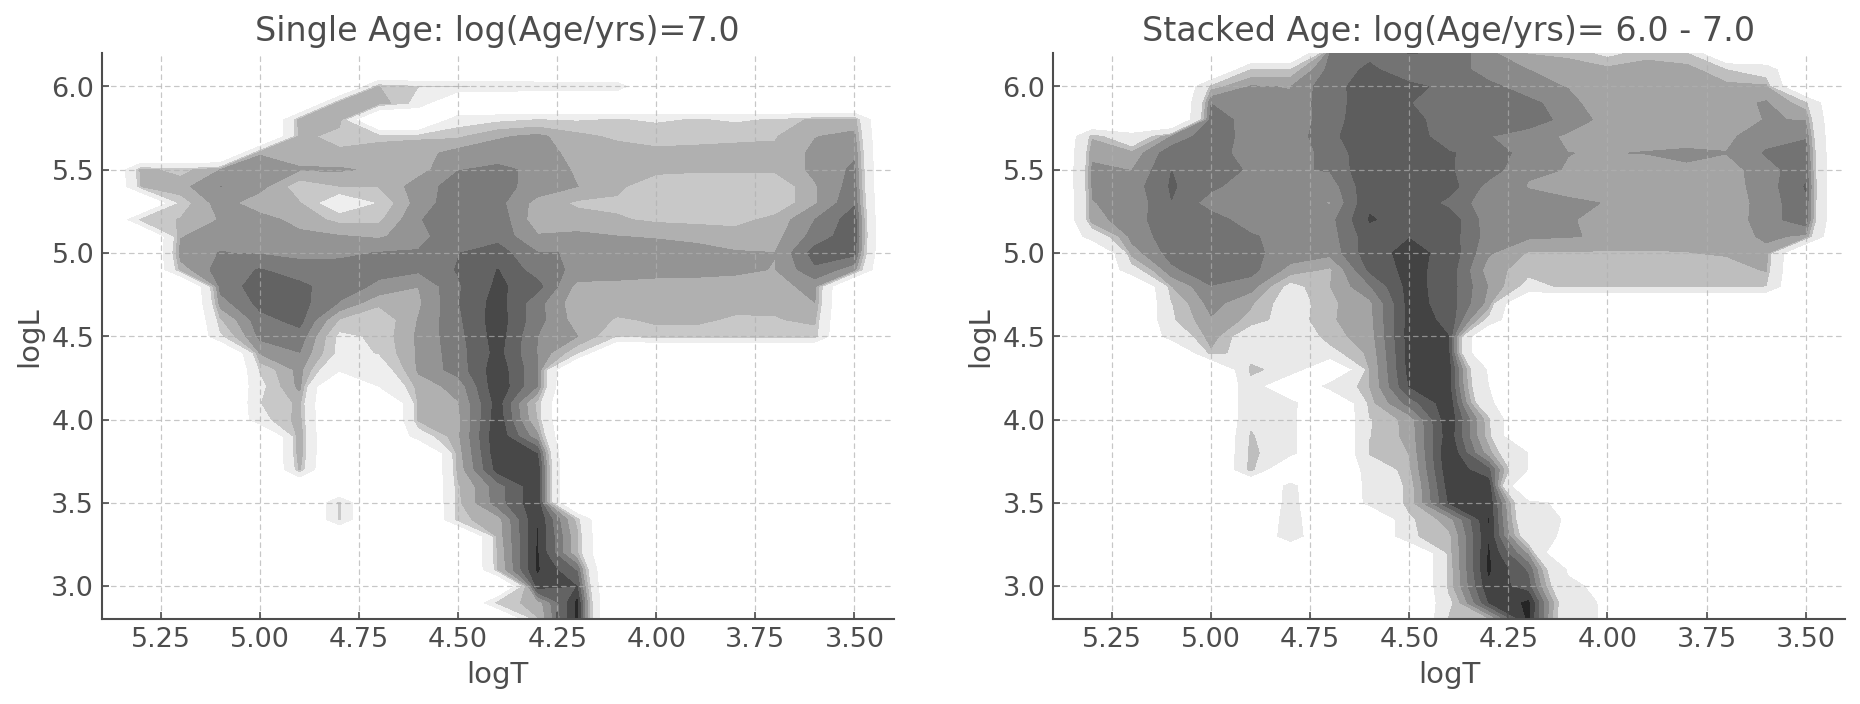

In [16]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

bin_hr_diagram.plot(log_age=7, loc=ax[0]) #levels adjusted for visualisation
ax[0].set_xlim([5.4, 3.4])
ax[0].set_ylim([2.8, 6.2])
ax[0].set_title('Single Age: log(Age/yrs)=7.0')


bin_hr_diagram.plot(age_range=[6.0, 7.0], loc=ax[1]) # levels adjusted for visualisation
ax[1].set_xlim([5.4, 3.4])
ax[1].set_ylim([2.8, 6.2])
ax[1].set_title('Stacked Age: log(Age/yrs)= 6.0 - 7.0')

---

**YOU'RE ALL SET!**

I hope you found this tutorial useful. If you encountered any problems, or would like to make a suggestion, feel free to open an issue on `hoki` GitHub page [here](https://github.com/HeloiseS/hoki) or on the `hoki_tutorials` GitHub [there](https://github.com/HeloiseS/hoki_tutorials).